## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

Now, let's get started to explore the data set. First, import the necessary libraries and read the dataset as pandas dataframe to process. Then, take a look at the first few rows of the dataframe.

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

#peek data set
df=pd.read_csv('datasets/office_episodes.csv')
df.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


Let's check the information about the dataframe as well.

In [2]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


As we can see above, there is no null values in the columns except some values in guest_stars columns. This means that some of the episodes has not guest stars. The data looks fine. Then, let's check some more information on the summary statistics of the interested columns of the dataset.

In [3]:
# check statistics of necessary columns
df[['episode_number','viewership_mil','scaled_ratings']].describe()

,episode_number,viewership_mil,scaled_ratings
count,188.000000,188.000000,188.000000
mean,93.500000,7.246330,0.511636
std,54.415071,2.066012,0.184353
min,0.000000,3.250000,0.000000
25%,46.750000,5.990000,0.375000
50%,93.500000,7.535000,0.500000
75%,140.250000,8.425000,0.625000
max,187.000000,22.910000,1.000000


Data visualization is a good way to start exploring data.Scatter plots’ primary uses are to observe and show relationships between two numeric variables. The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole. Now, let's start creating an informative plot of the episodes and let's try to answer the targe question: Who is one of the most popular top star being presemt in the most watched and the most rated episode?

In [4]:
#color scheme
colors=[]

for key, value in df.iterrows():
    if value['scaled_ratings']<0.25:
        colors.append('red')
    elif value['scaled_ratings']<0.5:
        colors.append('orange')
    elif value['scaled_ratings']<0.75:
        colors.append('lightgreen')
    else:
        colors.append('darkgreen')

#print(colors)


In [5]:
#sizing system
sizes=[]

for key,value in df.iterrows():
    if value['has_guests']==True:
        sizes.append(250)
    else:
        sizes.append(25)
#print(sizes)



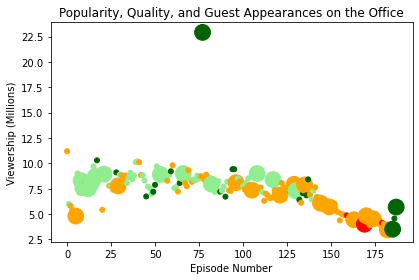

In [6]:
# scatter plot
fig=plt.figure()
plt.scatter(x=df['episode_number'],y=df['viewership_mil'],c=colors,s=sizes)
#labels
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

#show the figure
plt.show()

In the above scatter plot,  dark green color data points represent the episodes which have the higest ratings. Among them, the bigger ones represent the episodes which has the guest stars. From the illustration of the plot, we can see that there is one top watched episode which has ratings more than 75% and also has guest stars in our dataset. Now, let's find out who is the top star being present in the most watched and the most rated episode.

In [7]:
max_viewership=df['viewership_mil'].max()
#print(max_viewership)
top_stars=df.loc[df['viewership_mil']==max_viewership,'guest_stars'].iloc[0]
#print(top_stars)

top_stars_list=top_stars.split(',')
print(top_stars_list)

#random select one of top-stars
import random
top_star=random.choice(top_stars_list).strip()
print(top_star)


['Cloris Leachman', ' Jack Black', ' Jessica Alba']
Jessica Alba


Now, form the analysis result, it is find out that there are three guest stars participated in the most watched which has highest ratings episode. They are Cloris Leachman, Jack Black and Jessica Alba.
Now, let's find out more about the season-related information between seasons and viewership and ratings. Let's first check how many episodes are there for each season.

In [8]:
#check episode_count
print(df.groupby('season').size())

season
1     6
2    22
3    23
4    14
5    26
6    26
7    24
8    24
9    23
dtype: int64


We can see that each season had different episode counts. To check the seasons whihch have highest viewership, highest ratings,and highest votes, the data frame is pivoted using pandas pivot-table funtion. Mean value for each seanson is calculater since there are different episode counts for each season.

In [14]:
import numpy as np

#pivot the dataframe to check relationship between 
df_1=df.pivot_table(df,index=['season'],aggfunc={'ratings':np.mean,'viewership_mil':np.mean})
df_1.reset_index(inplace=True)
print(df_1)
print(df_1.max())
print(df_1.min())

   season   ratings  viewership_mil
0       1  7.966667        6.366667
1       2  8.440909        8.168182
2       3  8.586957        8.494348
3       4  8.564286        8.547857
4       5  8.488462        8.756538
5       6  8.196154        7.766154
6       7  8.308333        7.305833
7       8  7.604167        5.385417
8       9  7.913043        4.138696
season            9.000000
ratings           8.586957
viewership_mil    8.756538
dtype: float64
season            1.000000
ratings           7.604167
viewership_mil    4.138696
dtype: float64


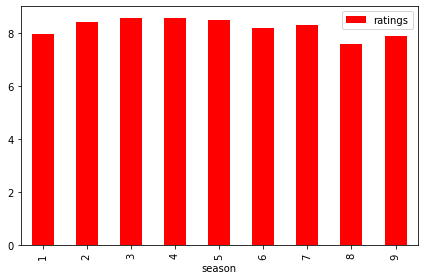

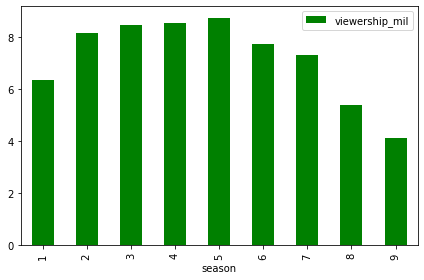

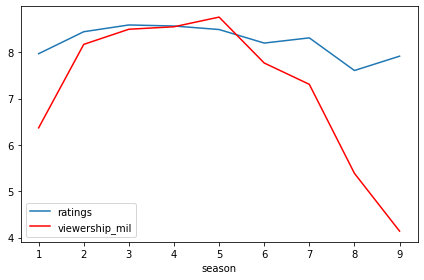

In [13]:
df_1.plot(kind='bar',x='season',y='ratings',color='red')
df_1.plot(kind='bar',x='season',y='viewership_mil',color='green')

plt.show()

ax=plt.gca()
df_1.plot(kind='line',x='season',y='ratings',ax=ax)
df_1.plot(kind='line',x='season',y='viewership_mil',color='red',ax=ax)

plt.show()

We can see the average ratings for each season has no much differnce where the highest average ratings is Season 4.  Starting from season 2, the amount of viewers was increasing slightly by slightly and reached the peak at Season 5.  The average viewers started to decline starting from season 6 where season has the least average viewers. We can see that there is no relationship between viewership and ratings. Personally I think, eventhough viewers were getting less after Season5, the viewers for each season satisfied and enjoyed watching the Office series.